<a href="https://colab.research.google.com/github/JChengecha/test-for-hypothyroidism/blob/main/Nairobi_Hospital_test_for_hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing for Hypothyroidism 
---

Applying supervised learning algorithms:

* Random Forest
* Support Vector Machines

 # The Research Question





To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid using supervised machine learning

### The Metric for Success

* To get a better understanding of the symptoms related to hypothyroid
* To come up with a classification Model that best predicts if a patient has hypothyroid or not

###  The Experimental Design

* This entails ensuring the dataset is clean
* Performing Exploratory Data Analysis to understand the dataset better 
* Coming up with the various classification models and evaluating their performance by use of an accuracy score. In this case the models to focus on
is the decision trees and support vector machines 
* The model with the highest accuracy score is selected

# Reading & Checking the Dataset

######Importing some of the libraries to used

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df=pd.read_csv('hypothyroid.csv')


######previewing the dataset

In [82]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [83]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


######checking the information and datatypes

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [85]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

# Data Cleaning

#### Getting the column names in lowercase, for easier coding and presentation

In [86]:
# lower the case of the column names
df.columns=df.columns.str.lower()
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


####Replacing the inappropiate character '?' for missing values with NAN

In [87]:
df=df.replace('?',np.nan)

####Converting the dtypes of the continous variables to float type

In [88]:
#Convert data types 
df[['age','tsh',	't3',	'tt4','t4u','fti','tbg']]=df[['age','tsh',	't3',	'tt4','t4u','fti','tbg']].astype(float)

In [89]:
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                          float64
dtype: object

#### Dealing with null values

In [90]:
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

In [91]:
#df[df['t4u_measured']=='n']
df[(df['tbg_measured']=='y') & (df['tbg']==0)]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
166,negative,60.0,M,t,f,f,f,f,f,f,f,f,f,f,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,0.0


In [92]:
t=df['sex'].mode()
t

0    F
dtype: object

In [93]:
#filling in the null values in column age with its mean
df['age'].fillna(df['age'].mean(),inplace=True)

#Replacing NAN values with the most frequent occurred category in sex variable

df['sex'].fillna('F',inplace=True)


#filling all the unmeasured values with 0.0
df['tsh'].fillna(0.0,inplace=True)
df['t3'].fillna(0.0,inplace=True)
df['tt4'].fillna(0.0,inplace=True)
df['t4u'].fillna(0.0,inplace=True)
df['fti'].fillna(0.0,inplace=True)
df['tbg'].fillna(0.0,inplace=True)

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

#### Checking for outliers

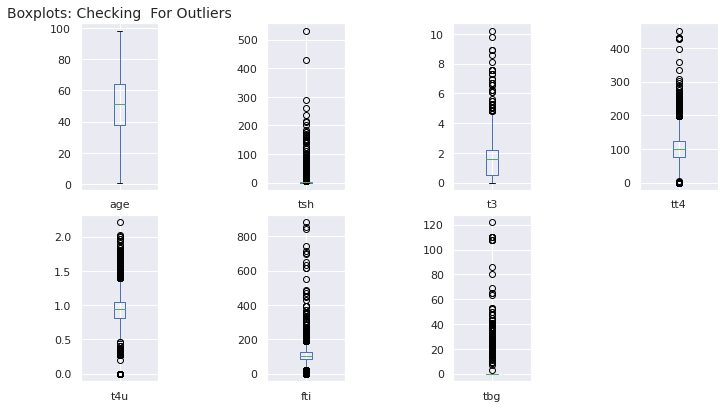

In [94]:
plt.subplot(341)
plt.title('Boxplots: Checking  For Outliers',fontsize=14,)
df['age'].plot.box(figsize=(10,8))
plt.tight_layout(pad=0.5)

plt.subplot(342)
df['tsh'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(343)
df['t3'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(344)
df['tt4'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(345)
df['t4u'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(346)
df['fti'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(347)
df['tbg'].plot.box()
plt.tight_layout(pad=0.5)

it would be advisable to not remove the outliers as this would lead to losing alot of information

#  Exploratory Analysis

checking on the various categorical variables

In [95]:
print('\nstatus of the selected sample \n',df.status.value_counts())
print('\nGender \n',df.sex.value_counts())
print('\nIndividuals on Thyroxine Medication \n',df.on_thyroxine.value_counts())
print('\nIndividuals with Query on Thyroxine \n',df.query_on_thyroxine.value_counts())
print('\n Individuals on Antithyroid Medication \n',df.on_antithyroid_medication.value_counts())
print('\nindividuals who had Thyroid Surgery\n',df.thyroid_surgery.value_counts())
print('\nIndividuals with Query on Hypothyroid\n',df.query_hypothyroid.value_counts())
print('\nIndividuals with Query on Hyperthyroid\n',df.query_hyperthyroid.value_counts())
print('\Individuals who are Pregnant \n',df.pregnant.value_counts())
print('\nIndividuals who are Sick \n',df.sick.value_counts())
print('\nIndividuals who have Tumor \n',df.tumor.value_counts())
print('\nIIndividuals on Lithium Medication \n',df.lithium.value_counts())
print('\n Individuals with Goitre \n',df.goitre.value_counts())



status of the selected sample 
 negative       3012
hypothyroid     151
Name: status, dtype: int64

Gender 
 F    2255
M     908
Name: sex, dtype: int64

Individuals on Thyroxine Medication 
 f    2702
t     461
Name: on_thyroxine, dtype: int64

Individuals with Query on Thyroxine 
 f    3108
t      55
Name: query_on_thyroxine, dtype: int64

 Individuals on Antithyroid Medication 
 f    3121
t      42
Name: on_antithyroid_medication, dtype: int64

individuals who had Thyroid Surgery
 f    3059
t     104
Name: thyroid_surgery, dtype: int64

Individuals with Query on Hypothyroid
 f    2922
t     241
Name: query_hypothyroid, dtype: int64

Individuals with Query on Hyperthyroid
 f    2920
t     243
Name: query_hyperthyroid, dtype: int64
\Individuals who are Pregnant 
 f    3100
t      63
Name: pregnant, dtype: int64

Individuals who are Sick 
 f    3064
t      99
Name: sick, dtype: int64

Individuals who have Tumor 
 f    3123
t      40
Name: tumor, dtype: int64

IIndividuals on Lithium M

Insights:
* It is evident that majority of our population is not under the specified medications or are sick or have the specified illnesses(goitre, tumor)
* the dataset has also fewer records of expecting mothers (pregnant)

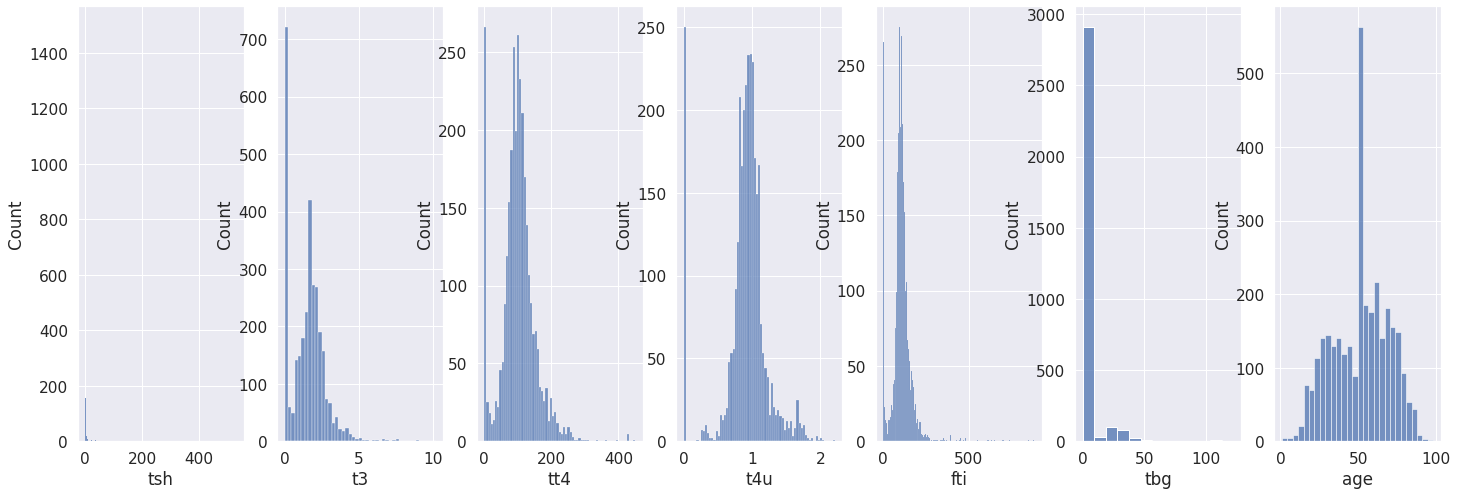

In [96]:
sns.set(font_scale=1.4)
plt.figure(figsize=(28,8))
plt.gca().set_title('Histograms')

plt.subplot(181)
sns.histplot(df['tsh'])

plt.subplot(182)
sns.histplot(df['t3'])

plt.subplot(183)
sns.histplot(df['tt4'])

plt.subplot(184)
sns.histplot(df['t4u'])

plt.subplot(185)
sns.histplot(df['fti'])

plt.subplot(186)
sns.histplot(df['tbg'])

plt.subplot(187)
sns.histplot(df['age'])
plt.show()

the above output shows the distributions of the various continuous variables

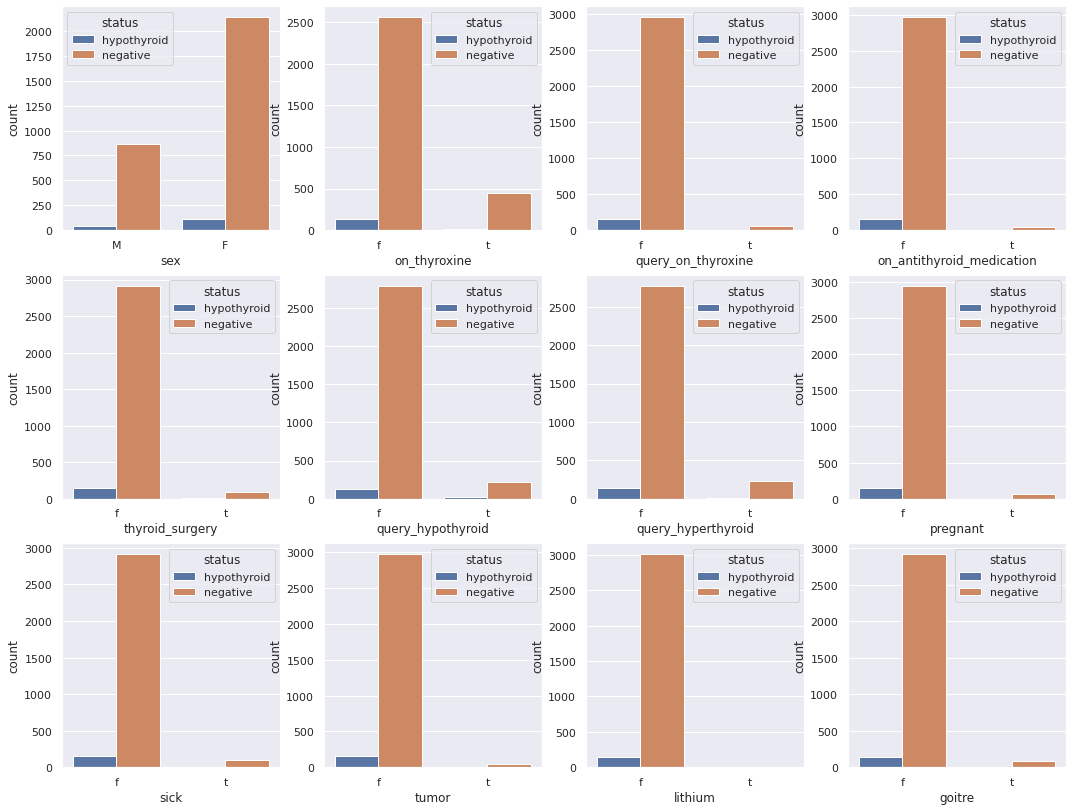

In [97]:
sns.set(rc={'figure.figsize':(18,14)})
plt.title('Countplots')
plt.subplot(341)
sns.countplot(x="sex", hue='status', data=df)
plt.subplot(342)
sns.countplot(x="on_thyroxine", hue='status', data=df)
plt.subplot(343)
sns.countplot(x="query_on_thyroxine", hue='status', data=df)
plt.subplot(344)
sns.countplot(x="on_antithyroid_medication", hue='status', data=df)
plt.subplot(345)
sns.countplot(x="thyroid_surgery", hue='status', data=df)
plt.subplot(346)
sns.countplot(x="query_hypothyroid", hue='status', data=df)
plt.subplot(347)
sns.countplot(x="query_hyperthyroid", hue='status', data=df)
plt.subplot(348)
sns.countplot(x="pregnant", hue='status', data=df)
plt.subplot(349)
sns.countplot(x="sick", hue='status', data=df)
plt.subplot(3,4,10)
sns.countplot(x="tumor", hue='status', data=df)
plt.subplot(3,4,11)
sns.countplot(x="lithium", hue='status', data=df)
plt.subplot(3,4,12)
sns.countplot(x="goitre", hue='status', data=df)
plt.show()

Insights:
 * Females are more prone to contacting hypothyroid than males
 * Individuals who are not on the specified medications , were not pregnant and 
 were not generally sick on the specified illnesses were more prone to contracting hypothyroid
  



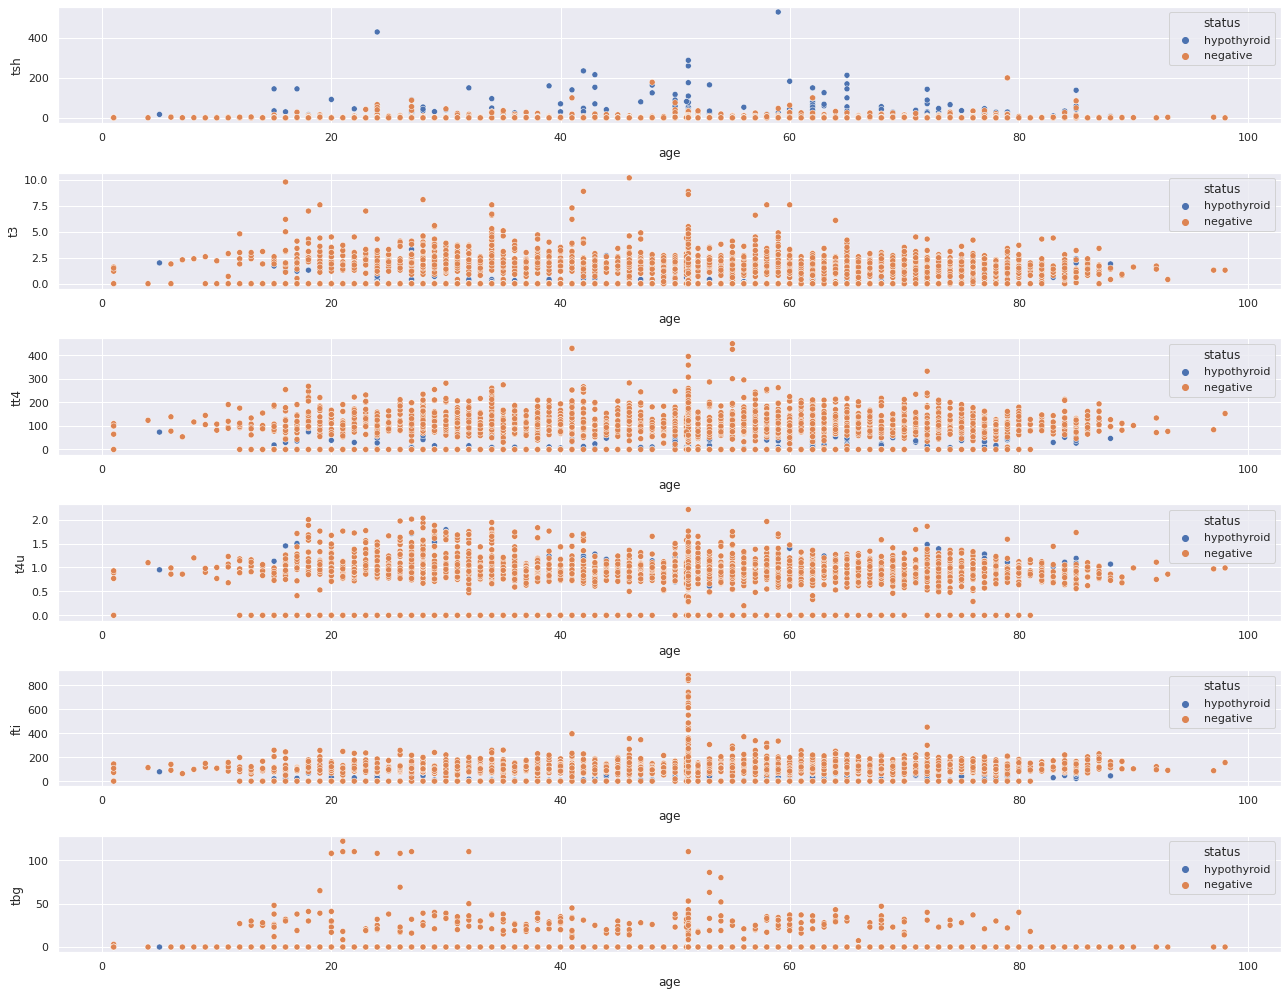

In [98]:
#sns.set(rc={'figure.figsize':(18,14)})

fig, ax = plt.subplots(6)

#plt.subplot(321)
sns.scatterplot(x="age", y="tsh", hue="status", data=df,ax=ax[0])

#plt.subplot(322)
g2=sns.scatterplot(x="age", y="t3", hue="status", data=df,ax=ax[1])

#plt.subplot(323)
sns.scatterplot(x="age", y="tt4", hue="status", data=df,ax=ax[2])

#plt.subplot(324)
sns.scatterplot(x="age", y="t4u", hue="status", data=df,ax=ax[3])

#plt.subplot(325)
sns.scatterplot(x="age", y="fti", hue="status", data=df,ax=ax[4])

#plt.subplot(326)
sns.scatterplot(x="age", y="tbg", hue="status", data=df,ax=ax[5])

plt.tight_layout()
plt.show()

Insights:
* From the analysis, individuals measured with TSH were most likely to have the hypothyroid across all ages
* Some low measurements of T3, TT4 and FTI would most likely indicate an individual had Hypothyroid across all ages


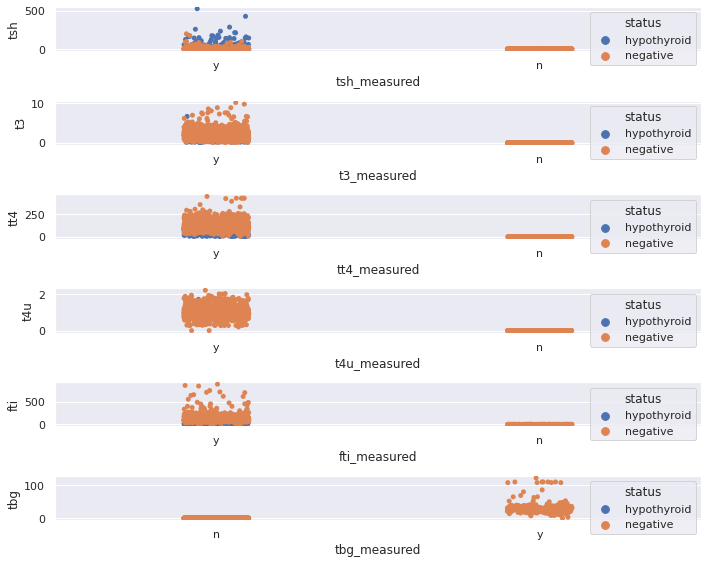

In [99]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots(6)
#plt.subplot(231)
sns.stripplot(x="tsh_measured", y="tsh", hue="status", data=df,ax=ax[0])
#plt.subplot(232)
sns.stripplot(x="t3_measured", y="t3", hue="status", data=df,ax=ax[1])
#plt.subplot(233)
sns.stripplot(x="tt4_measured", y="tt4", hue="status", data=df,ax=ax[2])
#plt.subplot(234)
sns.stripplot(x="t4u_measured", y="t4u", hue="status", data=df,ax=ax[3])
#plt.subplot(235)
sns.stripplot(x="fti_measured", y="fti", hue="status", data=df,ax=ax[4])
#plt.subplot(236)
sns.stripplot(x="tbg_measured", y="tbg", hue="status", data=df,ax=ax[5])

plt.tight_layout()
plt.show()

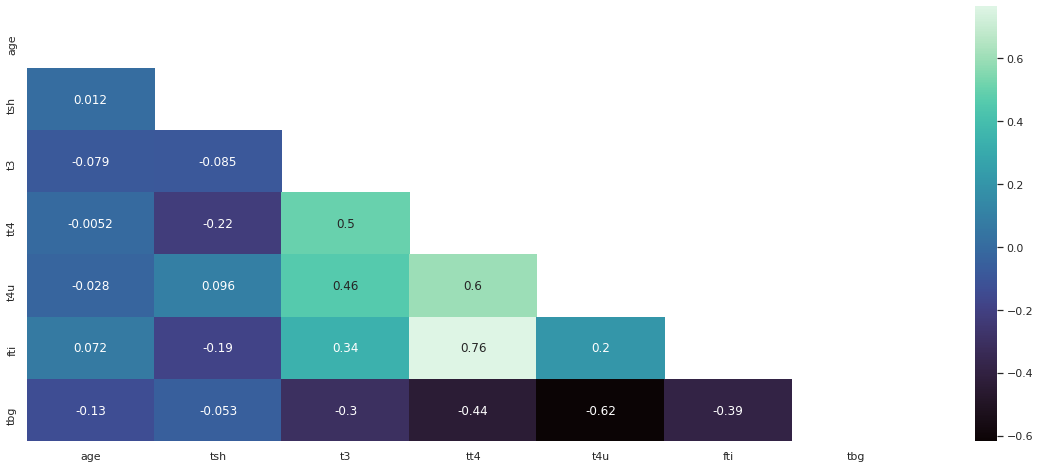

In [100]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,8))
    ax = sns.heatmap(df.corr(),
mask=mask,annot=True,cmap="mako")

From the above, theres is a relatively high positive correlation between the TT4 measured and FTI measured

#  Implementing the Solution

Data Preprocessing

In [101]:

# One-hot encode the data using pandas get_dummies
df = pd.get_dummies(df,columns=['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                              	'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick',
                                'tumor','lithium','goitre','tsh_measured','t3_measured','tt4_measured','t4u_measured',
                                'fti_measured','tbg_measured'],drop_first=True)
# Display the first  

df.head(5)


,age,tsh,t3,tt4,t4u,fti,tbg,status_negative,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,tsh_measured_y,t3_measured_y,tt4_measured_y,t4u_measured_y,fti_measured_y,tbg_measured_y
0,72.0,30.0,0.6,15.0,1.48,10.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,15.0,145.0,1.7,19.0,1.13,17.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,24.0,0.0,0.2,4.0,1.00,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,24.0,430.0,0.4,6.0,1.04,6.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,77.0,7.3,1.2,57.0,1.28,44.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


In [102]:
# Data preprocessing
y=df['status_negative'].values
#creating a list of the independent variables 
test_features = df.columns.to_list()
#removing the dependent variable from the list
test_features.remove('status_negative')

X=df[test_features].values

In [103]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [104]:
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Part 1: Decision trees

### Executing a Random forest

In [105]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


forest = RandomForestClassifier(n_estimators= 200 ,random_state=0)


parameters={'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
            'max_depth' : np.arange(1, 32, 4)}

forest_grid = GridSearchCV(estimator=forest,param_grid=parameters,n_jobs=1,refit=True,cv=10 )

forest_grid = forest_grid.fit(X_train, y_train)

print("Random forest best parameters:", forest_grid.best_params_)


Random forest best parameters: {'max_depth': 5, 'min_samples_split': 0.1}


In [106]:
# Predict based on the model we've trained
y_pred_rforest = forest_grid.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rforest))

Accuracy: 0.9789251844046365


Recreating the model using the best parameters

In [107]:
forest = RandomForestClassifier(n_estimators= 200,max_depth= 5, min_samples_split = 0.1 ,random_state=0)
forest = forest.fit(X_train, y_train)

#### Visualizing a decison tree from the  model

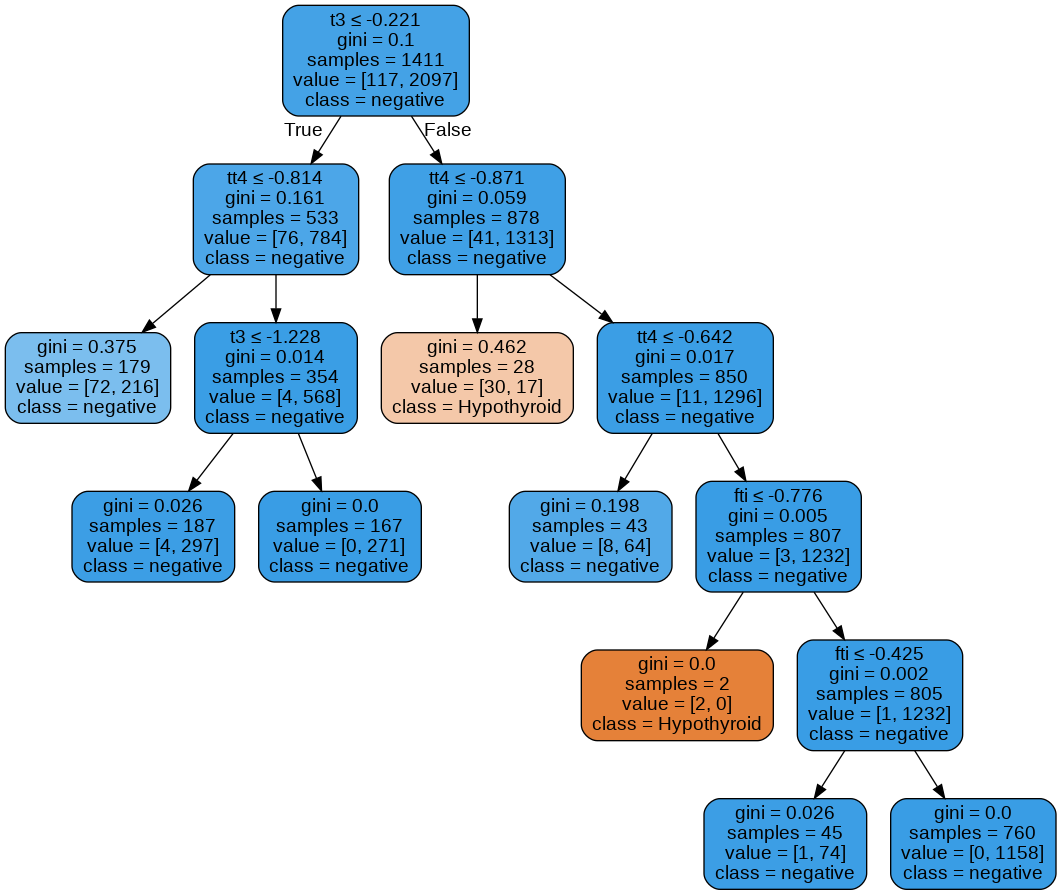

In [108]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree = forest.estimators_[100]
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

### Executing Gradient Boosted Trees.

Using the best parameters from the random forest model ie. max_depth and min_samples_split to optimize the best learning rate for the gradient boosted model

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200 ,min_samples_split= 0.1, max_depth=5, random_state=0)


parameters={'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01]}

gradient_grid = GridSearchCV(estimator=gbc,param_grid=parameters,n_jobs=1,refit=True,cv=5 )

gradient_grid=gradient_grid.fit(X_train, y_train)

print("Gradient best parameters:", gradient_grid.best_params_)

Gradient best parameters: {'learning_rate': 0.01}


In [110]:
# Predict based on the model we've trained
y_pred_gradient = gradient_grid.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gradient))

Accuracy: 0.9884088514225501


Recreating the model using the best parameters

In [111]:
gradient = GradientBoostingClassifier(n_estimators=200, learning_rate= 0.01,
                                 min_samples_split= 0.1, max_depth= 5, random_state=0)
gradient = gradient.fit(X_train, y_train)

#### Visualizing a decison tree from the model

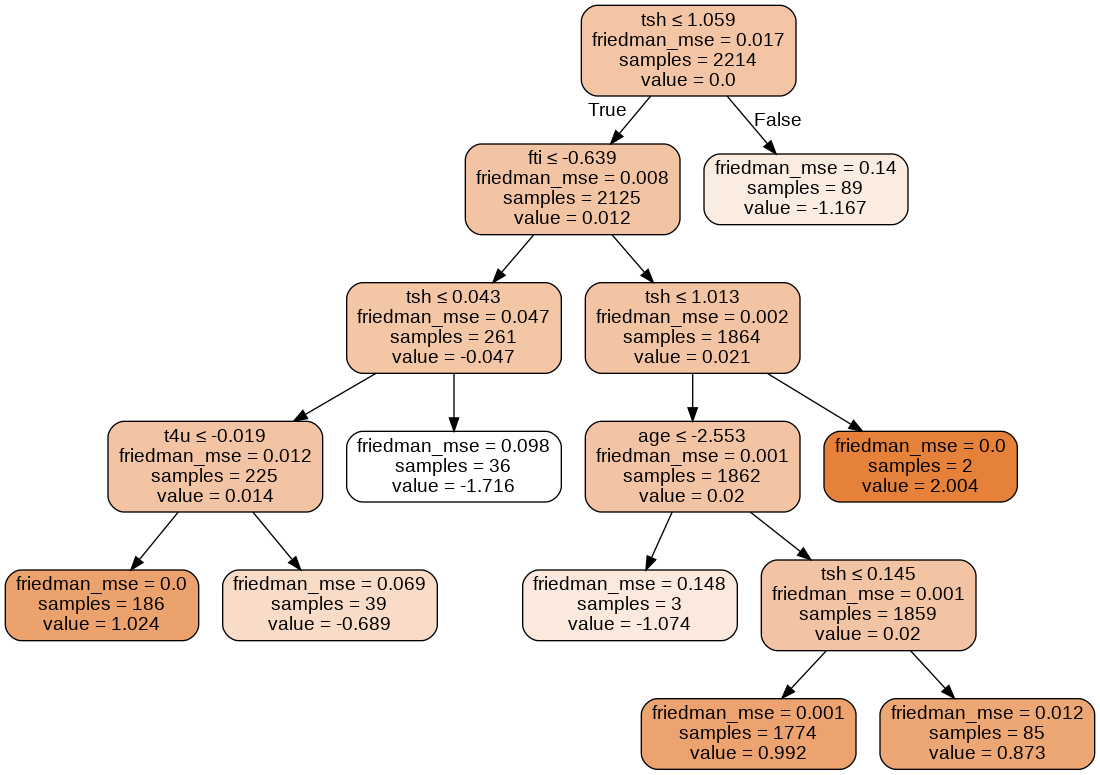

In [112]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree = gradient.estimators_[100,0]
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_gradient.png')
Image(graph.create_png())

From the two models:

The Gradient Boosted trees had an accuracy score of 0.9884 while the Random forest had an accuracy score of 0.9789 .Its only logical to pick the best performing model



#### Evaluating the important features

using the best performing model

In [113]:
# Get numerical feature importances
importances = list(gradient.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('tsh', 0.92), ('t3', 0.0), ('tt4', 0.0), ('t4u', 0.0), ('fti', 0.07), ('tbg', 0.0), ('sex_M', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_t', 0.0), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_t', 0.0), ('sick_t', 0.0), ('tumor_t', 0.0), ('lithium_t', 0.0), ('goitre_t', 0.0), ('tsh_measured_y', 0.0), ('t3_measured_y', 0.0), ('tt4_measured_y', 0.0), ('t4u_measured_y', 0.0), ('fti_measured_y', 0.0), ('tbg_measured_y', 0.0)]

Variable: tsh                  Importance: 0.92
Variable: fti                  Importance: 0.07
Variable: age                  Importance: 0.0
Variable: t3                   Importance: 0.0
Variable: tt4                  Importance: 0.0
Variable: t4u                  Importance: 0.0
Variable: tbg                  Importance: 0.0
Variable: sex_M                Importance: 0.0
Variable: on_thyroxine_t       Importance: 0.0
Variable: query_on_thyroxine_t 

The above output is a list of features ordered by their importance in separating the classes of the target variable status

## Part 2: Support Vector Machines

**preprocessing data**

This will entail selecting the most important features as given by the decision trees.

The features that best separates the target variable are:
*  TSH                  
* FTI 

In [114]:
# Specifying the input for the models
y=df['status_negative'].values

X=df[['tsh','fti']].values

standard scaling

In [115]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [116]:
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Executing a Support Vector Classifier 

#### Fitting a model:Using Linear function Kernel

getting the best parameters for fitting the model

In [117]:
from sklearn.svm import SVC

linear_svc = SVC(kernel = 'linear')

parameters={'C' : [0.1, 1, 10, 100,1000]}

linear_svc_grid = GridSearchCV(estimator = linear_svc , param_grid = parameters , n_jobs=-1 ,refit=True, cv=5 )

linear_svc_grid = linear_svc_grid.fit(X_train,y_train)

print("Linear SVC best parameters:", linear_svc_grid.best_params_)

Linear SVC best parameters: {'C': 10}


Recreating the model and checking the accuracy score

In [118]:
# Let's now build the svm model 
linear_svc = SVC(C=10,kernel = 'linear')
# Train the model using the training set
linear_svc=linear_svc.fit(X_train,y_train)

In [119]:
# Predict the response for the test set
y_pred_linear = linear_svc.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))

Accuracy: 0.9704952581664911


visualizing the linear svc

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


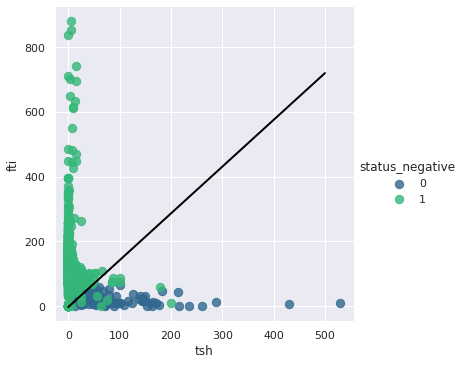

In [120]:
# Get the separating hyperplane
w = linear_svc.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(0.0,500)
yy = a * xx - (linear_svc.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('tsh','fti', data=df, hue='status_negative', palette='viridis', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

#### Fitting a model: Using Polymomial function Kernel

getting the best parameters for fitting the model

In [121]:
from sklearn.svm import SVC

poly_svc = SVC(C=10,kernel='poly',gamma='auto')

parameters={'degree':[2, 3, 4, 5, 6]}

poly_svc_grid = GridSearchCV(estimator = poly_svc , param_grid = parameters , n_jobs=-1 ,refit=True, cv=5 )

poly_svc_grid = poly_svc_grid.fit(X_train,y_train)

print("Polynomial SVC best parameters:", poly_svc_grid.best_params_)

Polynomial SVC best parameters: {'degree': 3}


Recreating the model and checking the accuracy score

In [122]:
# Building the model 
poly_svc = SVC(C=10 , kernel='poly', degree=3 , gamma='auto')
# Training the model using the training set
poly_svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
# Predict the response for the test set
y_pred_poly = poly_svc.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_poly))

Accuracy: 0.9810326659641728


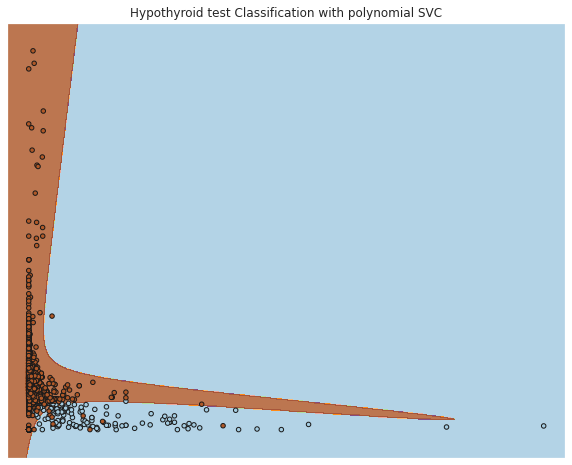

In [124]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid test Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, poly_svc, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

#### Fitting a model: Using Gaussian radial basis function (RBF) Kernel

getting the best parameters for fitting the model

In [125]:
from sklearn.svm import SVC

rbf_svc = SVC(C=10,kernel='rbf')

parameters={'gamma' :['auto','scale']}

rbf_svc_grid = GridSearchCV(estimator = rbf_svc , param_grid = parameters , n_jobs=-1 ,refit=True, cv=5 )

rbf_svc_grid = rbf_svc_grid.fit(X_train,y_train)

print("RBF SVC best parameters:", rbf_svc_grid.best_params_)

RBF SVC best parameters: {'gamma': 'auto'}


Recreating the model and checking the accuracy score

In [126]:
# Building the model 
rbf_svc = SVC(C=10 , kernel='rbf' , gamma='auto')
# Training the model using the training set
rbf_svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
# Predict the response for the test set
y_pred_rbf = rbf_svc.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy: 0.9863013698630136


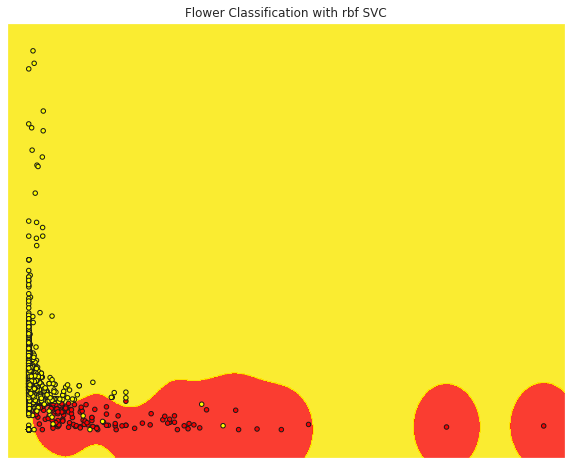

In [128]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbf_svc, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Insights:

From the SVM models above, using the rbf kernel performed best as compared to using the linear and polynomial kernel models.

## Adding additional features to best performing model 

preprocessing

In [129]:
# Specifying the input for the models
y=df['status_negative'].values

X=df.drop('status_negative',axis=1).values

In [130]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [131]:
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Modelling: 

Training the model

In [132]:
from sklearn.svm import SVC

# Building the model 

model = SVC(C=10 , kernel='rbf' , gamma='auto')

# Training the model using the training set

model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluating the accuracy of the model

In [133]:
# Predict the response for the test set
y_pred = model.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9778714436248683


Adding more features to the best performing model in an attempt to evaluate its performance.

The resultant model gave an accuracy of 0.9778 while the two-feature model had an accuracy of 0.9863



# Conclusions

* From the analysis, individuals measured with TSH were most likely to have the hypothyroid across all ages
* Some low measurements of T3, TT4 and FTI would most likely indicate an individual had Hypothyroid across all ages
* Tests for TT4 seemed to be correlated with the tests of FTI

* In Support Vector Machines,the model with the RBF kernel performed best as compared to the linear and polynomial kernel model


* But generally, the best performing model overall given that it incorporated all the features was the gradient boosted trees which had an accuracy score of 0.9884